# Primer on Object Oriented Programming

Object Oriented Programming (OOP) is at the heart of many ML/DL based frameworks; without understanding it, it is easy to get lost amidst the seeming mess of code on public github repositories. OOP primarily revolves around the creation and use of classes and instances of them. In the example below, we create a Person class with its instance attributes, constructor and instance method.

In [ ]:
class Person(object):
  """
  This is a Person class
  """
  # constructor
  def __init__(self, name, age):
    # instance attributes
    self.name = name
    self.age = age

  # instance method
  def introduce(self):
    print(f"I am {self.name} and I am {self.age} years old.")

We then create an **instance** of the Person class called p1 and call the introduce function.

In [ ]:
p1 = Person("John Doe", 25)
p1.introduce()

I am John Doe and I am 25 years old.


But classes such as Person (above) are generic, and have attributes that can be reused for more specific classes of people, e.g. Policeman, Teacher. Hence, we can **inherit** from the Person class when creating these more specific classes. An example is shown below. 

In [ ]:
# child class PoliceMan of parent class Person
class PoliceMan(Person):

  def __init__(self, name, age, action):
    super(PoliceMan, self).__init__(name, age)
    self.action = action

  def work(self):
    print(f"I {self.action} criminals as my job.")

# another child class Teacher of parent class Peron
class Teacher(Person):

  def __init__(self, name, age, action):
    super(Teacher, self).__init__(name, age)
    self.action = action
  
  def work(self):
    print(f"I {self.action} students at a school.")

In [ ]:
p2 = PoliceMan("Bob", 32, "catch")
p2.introduce()
p2.work()

p3 = Teacher("Jane", 27, "teach")
p3.introduce()
p3.work()

I am Bob and I am 32 years old.
I catch criminals as my job.
I am Jane and I am 27 years old.
I teach students at a school.


One additional thing to note about classes is the ability to write something called magic methods in python. These methods are also called 'dunder' methods, and are recognized by the double _ before and after the method name. N.B. is __init__ is one of them!

Dunder methods add a lot of unseen functionality to our classes. For example, ever wondered why you could add 2 integers together? How does the plus sign implement its functionality in python?

In [ ]:
c = 3 + 2
c

5

But if we add 2 PoliceMan instances as per above together, we will definitely get an error! Of course, in real life, it doesn't make sense to add 2 PoliceMan together as well right...

In [ ]:
p4 = PoliceMan("Craig", 45, "apprehend")
p5 = PoliceMan("Jack", 33, "catch")
combined = p4 + p5

TypeError: ignored

But what if I told you that it is actually possible to add them together, with a little bit of modification to our original PoliceMan class of course.

In [ ]:
# modified PoliceMan class
class PoliceMan(Person):

  def __init__(self, name, age, action):
    super(PoliceMan, self).__init__(name, age)
    self.action = action

  def work(self):
    print(f"I {self.action} criminals as my job.")

  def __add__(self, other_police):
    total_police = self.name + " and " + other_police.name
    print(f"We are {total_police}. We now have a police station!")

In [ ]:
p4 = PoliceMan("Craig", 45, "apprehend")
p5 = PoliceMan("Jack", 33, "catch")
combined = p4 + p5

We are Craig and Jack. We now have a police station!


In fact, we can check the implemented dunder methods for each of the built in class/data types that we know of by using the dir method. 

You should know this by now: where is the dir functionality even implemented???

In [ ]:
dir(PoliceMan)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'introduce',
 'work']

In [ ]:
dir(int)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

# Pytorch Datasets and Dataloaders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Ben Chew's Directory
!cp -r drive/My\ Drive/ML201+/Planet\ Dataset/* .

# Shaun's directory
# !cp -r drive/My\ Drive/Colab\ Notebooks/ML201+/ML201+/Planet\ Dataset/* .
!unzip train.zip

In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms
from torch import Tensor
from collections import Counter
from pandas import DataFrame
from math import ceil
import random 
import numpy as np
import torch 
import pandas as pd 
import os

We need to explore the dataset first before we do anything related with pytorch. If we look at what has been loaded, we have a train.csv, train folder and test folder. 

In many Machine Learning and Deep Learning problems, extensive EDA and feature engineering at the start is not required. However, there are still some basic things to look out for. These include:

1) Is this a classification or regression problem? (i.e. is the value to be predicted discrete or continuous)

2) Format of labels (are they strings, integers, do they need to be one hot encoded?)

3) What are the rough proportion of labels to be predicted in relation to one another if this is a classification problem?

4) What are the sizes of the train and test datasets respectively?

5) What does the train.csv contain?

Explore the dataset for the next 3-5 minutes and see if you can answer these questions:

In [ ]:
# Explore the dataset here


There are always 2 stages in the data preparation part when using pytorch: datasets and dataloaders. 

All pytorch datasets (whatever sort of dataset you want to create, that is) is a child class of the generic torch.utils.data.Dataset class. So to create a custom dataset class of our own, we need to **inherit** from this pytorch generic dataset class. 

https://pytorch.org/docs/stable/data.html

Additionally, every dataset class must implement minimally the following 2 methods: dunder_len and dunder_getitem. The former implements the functionality of finding out the size of your dataset using the len() method, while the latter implements the functionality of indexing into your dataset as how you would index a list.

In [ ]:
# ToTensor converts the numpy array to a torch Tensor of the same data type
class ToTensor(object):
    
  def __call__(self, x: np.ndarray) -> Tensor:
    return torch.Tensor(x)

# NormalizeStandardize first normalizes the input by scaling between 0 and 1
# Then it standardizes the inputs by some given mean and std dev stats
# Lastly it reshapes the numpy array to be channels first, i.e. C X H X W
class NormalizeStandardize(object):

  def __init__(self, mean: list, std: list):
    self.mean = np.array(mean)
    self.std = np.array(std)

  def __call__(self, x: np.ndarray) -> np.ndarray:
    normalized = np.true_divide(x, 255.0)
    standardized = np.true_divide((normalized - self.mean), self.std)
    return np.transpose(standardized, axes=(2, 0, 1))

# Applies each transformation iteratively on the input
class Compose(object):

  def __init__(self, transforms: list):
    self.transforms = transforms

  def __call__(self, x: np.ndarray) -> Tensor:
    for t in self.transforms:
      x = t(x)
    return x

In [ ]:
class PlanetDataset(Dataset):
    
    def __init__(self, csv_file: str,
                 img_dir: str, mapping: dict,
                 x_transforms: list=[],
                 y_transforms: list=[]):
        self.mapping = mapping
        self.labels = self.transform_labels(pd.read_csv(csv_file))
        self.img_dir = img_dir
        self.mean, self.std = self.calc_stats()
        x_transforms.extend([NormalizeStandardize(self.mean, self.std),
                                                         ToTensor()])
        y_transforms.append(ToTensor())
        self.x_transforms = Compose(x_transforms)
        self.y_transforms = Compose(y_transforms)

    def __len__(self):
        return len(self.labels)
        
    def __getitem__(self, idx: int):
        img = f"{self.img_dir}/{self.labels.iloc[idx, 0]}.jpg"
        img_array = np.array(Image.open(img).convert('RGB'))
        label = self.labels.iloc[idx, 2]
        
        img_array = self.x_transforms(img_array)
        label = self.y_transforms(label)
            
        return img_array, label
    
    def visualize_images(self, num_images: int=5):
        random_selection = np.random.choice(list(self.labels['image_name']), num_images)
        cols = 1
        rows = num_images
        fig = plt.figure(figsize=(6, 6*num_images))
        for i in range(1, rows+1):
            img = f"{self.img_dir}/{random_selection[i-1]}.jpg"
            img_array = np.array(Image.open(img).convert('RGB'))
            fig.add_subplot(rows, cols, i)
            plt.axis('off')
            plt.title(f"{self.labels.loc[self.labels['image_name']==random_selection[i-1], 'tags'].iloc[0]}")
            plt.imshow(img_array)
        fig.tight_layout()
        plt.show()

    def calc_stats(self):
      image_list = os.listdir(self.img_dir)
      images = np.true_divide(np.stack([np.array(Image.open(os.path.join(self.img_dir, img)).convert('RGB')) for img in image_list]), 255.0)
      mean = np.mean(images, axis=(0, 1, 2)).reshape(1, 1, -1)
      std = np.std(images, axis=(0, 1, 2)).reshape(1, 1, -1)
      return mean, std

    def transform_labels(self, df: DataFrame):
      df['labels'] = df['tags'].apply(lambda x: self._one_hot_encode(x))
      return df

    def _one_hot_encode(self, labels: str):
      labels = labels.split(' ')
      encoding = np.zeros(len(self.mapping.keys()))
      for label in labels:
        encoding[self.mapping[label]] = 1
      return encoding

We need to remember that the labels in the train.csv are in text format, so below are some handy processing functions to create their mappings to integers.

In [ ]:
def count_labels(csv_file: str):
  c = Counter()
  train_csv = pd.read_csv(csv_file)
  for i in range(len(train_csv)):
    tags = train_csv['tags'][i].split(' ')
    for l in tags:
      c[l] += 1
  return c, list(c.keys())

def create_mapping(keys):
  return {key : i for i, key in enumerate(keys)}

c, keys = count_labels('train.csv')
mapping = create_mapping(keys)

In [ ]:
ds = PlanetDataset(csv_file='train.csv',
                   img_dir='train',
                   mapping=mapping)

ds.visualize_images(4)

In [ ]:
def train_val_split(dataset: Dataset, train_split: float):
  train_size = ceil(train_split * len(dataset))
  valid_size = len(dataset) - train_size
  train_ds, valid_ds = random_split(dataset, [train_size, valid_size])
  return train_ds, valid_ds

train_ds, valid_ds = train_val_split(ds, 0.8)

Ok, so we're done creating the train and validation datasets...or are we?


Let's refactor our dataset class a little bit. 

In [ ]:
class PlanetDatasetReformatted(Dataset):
    
    def __init__(self, labels_df: DataFrame,
                 img_dir: str,
                 x_transforms: list=[],
                 y_transforms: list=[],
                 stats: tuple=(None, None)):
        self.mapping = mapping
        self.labels_df = labels_df
        self.img_dir = img_dir
        self.mean, self.std = stats[0], stats[1]
        self.x_transforms, self.y_transforms = self.make_transform(x_transforms, y_transforms)
        
    def __len__(self):
        return len(self.labels_df)
        
    def __getitem__(self, idx: int):
        img = f"{self.img_dir}/{self.labels_df.iloc[idx, 0]}.jpg"
        img_array = np.array(Image.open(img).convert('RGB'))
        label = self.labels_df.iloc[idx, 2]
        img_array = self.x_transforms(img_array)
        label = self.y_transforms(label)
            
        return img_array, label
    
    def visualize_images(self, num_images: int=5):
        random_selection = np.random.choice(list(self.labels['image_name']), num_images)
        cols = 1
        rows = num_images
        fig = plt.figure(figsize=(6, 6*num_images))
        for i in range(1, rows+1):
            img = f"{self.img_dir}/{random_selection[i-1]}.jpg"
            img_array = np.array(Image.open(img).convert('RGB'))
            fig.add_subplot(rows, cols, i)
            plt.axis('off')
            plt.title(f"{self.labels_df.loc[self.labels_df['image_name']==random_selection[i-1], 'tags'].iloc[0]}")
            plt.imshow(img_array)
        fig.tight_layout()
        plt.show()

    def make_transform(self, x_transforms, y_transforms):
      if self.mean is None and self.std is None:
        self.mean, self.std = self.calc_stats()
      x_transforms.extend([NormalizeStandardize(self.mean, self.std),
                                                        ToTensor()])
      y_transforms.append(ToTensor())
      return Compose(x_transforms), Compose(y_transforms)
 
    def calc_stats(self):
      image_list = list(self.labels_df['image_name'])
      images = np.true_divide(np.stack([np.array(Image.open(os.path.join(self.img_dir, img + '.jpg')).convert('RGB')) for img in image_list]), 255.0)
      mean = np.mean(images, axis=(0, 1, 2)).reshape(1, 1, -1)
      std = np.std(images, axis=(0, 1, 2)).reshape(1, 1, -1)
      return mean, std

    def get_stats(self):
      return self.mean, self.std


In [ ]:
def transform_labels(mapping: dict, df: DataFrame):
  df['labels'] = df['tags'].apply(lambda x: one_hot_encode(mapping, x))
  return df

def one_hot_encode(mapping: dict, labels: str):
  labels = labels.split(' ')
  encoding = np.zeros(len(mapping.keys()))
  for label in labels:
    encoding[mapping[label]] = 1
  return encoding

def train_val_split(csv_file: str,
                    img_dir: str,
                    mapping: dict,
                    seed: int,
                    train_split: float,
                    x_transforms: list=[],
                    y_transforms: list=[]):
  
  random.seed(seed)
  label_df = transform_labels(mapping, pd.read_csv(csv_file))
  label_df = label_df.sample(frac=1, random_state=seed).reset_index(drop=True)
  train_size = ceil(train_split * len(label_df))
  train_df, valid_df = label_df.iloc[:train_size], label_df.iloc[train_size:]
  train_ds = PlanetDatasetReformatted(labels_df=train_df,
                                      img_dir=img_dir,
                                      x_transforms=list(x_transforms),
                                      y_transforms=list(y_transforms))
  
  train_stats = train_ds.get_stats()
  valid_ds = PlanetDatasetReformatted(labels_df=valid_df,
                                      img_dir=img_dir,
                                      x_transforms=list(x_transforms),
                                      y_transforms=list(y_transforms),
                                      stats=train_stats)
  
  return train_ds, valid_ds

In [ ]:
train_ds, valid_ds = train_val_split(csv_file='train.csv',
                                     img_dir='train',
                                     mapping=mapping,
                                     seed=42,
                                     train_split=0.8)

img, label = train_ds[0]
print(img.shape, label.shape)

torch.Size([3, 256, 256]) torch.Size([17])


And now we're finally ready to move on to creating the dataloaders. 

In [ ]:
train_dl = DataLoader(train_ds, batch_size=16,
                      shuffle=True, num_workers=4)
                      
valid_dl = DataLoader(valid_ds, batch_size=8,
                      shuffle=False, num_workers=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


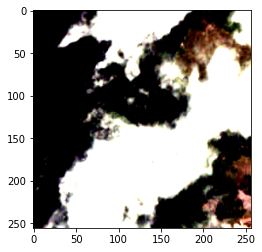

In [ ]:
image, labels = next(iter(train_dl))
plt.imshow(image[0].permute(1, 2, 0))

# Model Instantiation

Every custom model created in pytorch inherits from a base class torch.nn.Module. This is similar to the datasets creation above where each dataset class inherits from the base/parent dataset class. Each model must minimally implement 1 method: forward. This is responsible for the forward propagation through the network. 

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

Create any architecture you like with reference to the MNIST notebook. For now, stick to using Linear layers in the pytorch library, and have a maximum of only 5 layers for simplicity's sake.

In [ ]:
from torch import nn
from functools import partial

In [ ]:
# Code out the model class here

class Model(nn.Module):

  def __init__(self, hidden_dims: list, input_size: int, num_classes: int):
    super(Model, self).__init__()
    self.hidden_dims = hidden_dims
    assert len(self.hidden_dims) <= 4, "Too many layers used."
    self.layers = []
    prev_dim = input_size
    for cur_dim in self.hidden_dims:
      self.layers.append(nn.Linear(prev_dim, cur_dim))
      self.layers.append(nn.ReLU())
      prev_dim = cur_dim
    self.layers.append(nn.Linear(prev_dim, num_classes))
    self.layers.append(nn.Sigmoid())
    self.model = nn.ModuleList(self.layers)
  
  def forward(self, x: Tensor):
    B = x.shape[0]
    x = x.reshape(B, -1)
    for layer in self.model:
      x = layer(x)
    return x


We call create a partial callable class called model, because we don't know the exact input size and number of classes that will be input into the model yet. This makes our code more modular and flexible to different datasets. 

In [ ]:
model = partial(Model, hidden_dims=[3000, 1000, 100])

# Loss Function

The loss function is one aspect which is seldomly implemented from scratch, but we're doing it here purely for the sake of demonstration. 

In this particular problem, we use Binary Cross Entropy Loss instead of Cross Entropy Loss as with the MNIST example. Why?

In [ ]:
def BCELoss(eps, preds, labels):
  return -(labels*preds.clamp(min=eps).log()+(1-labels)*(1-preds).clamp(min=eps).log()).mean()

In [ ]:
eps = 1e-7
loss_func = partial(BCELoss, eps)

# Optimizer

The optimizer provides us with a way to update our weights with the gradients that we have calculated. In translating theory into practice, this is where the gradient descent is applied. This is a very simple implementation of SGD, with a more advanced version with momentum from the Pytorch library shown further below. 

In [ ]:
class SGDOptimizer(object):

  def __init__(self, params, lr):
    self.params, self.lr = list(params), lr

  def step(self):
    with torch.no_grad():
      for p in self.params:
        p -= lr * p.grad

  def zero_grad(self):
    for p in self.params:
      p.grad.data.zero_()

Every optimizer implemented in pytorch inherits from a base class torch.optim.Optimizer...ok this is getting repetitive now, so hopefully you're starting to see how pytorch was designed to be developed.

The optimizer implementation is a little unique because you'll notice that we use the super init a little differently; we are now telling this child class to initialize all attributes and methods of its parent class (optim.Optimizer), and that's where the attribute param_groups comes from, in case you were wondering. Param_groups is essentially a list of dictionaries, with each dictionary corresponding to different groups of weights in the model.

Each optimizer must minimally implement 1 method: step. Here, we implement the simplest optimizer there is, SGDOptimizer. 

https://pytorch.org/docs/stable/optim.html

**NB**: SGD normally has other hyperparameters to set such as momentum, weight decay, etc. In this case, I'm implementing a very vanilla version of it, so it becomes a lot simpler than what it looks. Do check out the documentation above for more in-depth understanding for how SGD and other more advanced optimizers are implemented.

In [ ]:
from torch.optim import Optimizer

In [ ]:
class SGD(Optimizer):
    r"""Implements stochastic gradient descent (optionally with momentum).

    Nesterov momentum is based on the formula from
    `On the importance of initialization and momentum in deep learning`__.

    Args:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float): learning rate
        momentum (float, optional): momentum factor (default: 0)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        dampening (float, optional): dampening for momentum (default: 0)
        nesterov (bool, optional): enables Nesterov momentum (default: False)

    Example:
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
        >>> optimizer.zero_grad()
        >>> loss_fn(model(input), target).backward()
        >>> optimizer.step()

    __ http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf

    .. note::
        The implementation of SGD with Momentum/Nesterov subtly differs from
        Sutskever et. al. and implementations in some other frameworks.

        Considering the specific case of Momentum, the update can be written as

        .. math::
            \begin{aligned}
                v_{t+1} & = \mu * v_{t} + g_{t+1}, \\
                p_{t+1} & = p_{t} - \text{lr} * v_{t+1},
            \end{aligned}

        where :math:`p`, :math:`g`, :math:`v` and :math:`\mu` denote the 
        parameters, gradient, velocity, and momentum respectively.

        This is in contrast to Sutskever et. al. and
        other frameworks which employ an update of the form

        .. math::
            \begin{aligned}
                v_{t+1} & = \mu * v_{t} + \text{lr} * g_{t+1}, \\
                p_{t+1} & = p_{t} - v_{t+1}.
            \end{aligned}

        The Nesterov version is analogously modified.
    """

    def __init__(self, params, lr=1e-3, momentum=0, dampening=0,
                 weight_decay=0, nesterov=False):
        if lr < 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if momentum < 0.0:
            raise ValueError("Invalid momentum value: {}".format(momentum))
        if weight_decay < 0.0:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))

        defaults = dict(lr=lr, momentum=momentum, dampening=dampening,
                        weight_decay=weight_decay, nesterov=nesterov)
        if nesterov and (momentum <= 0 or dampening != 0):
            raise ValueError("Nesterov momentum requires a momentum and zero dampening")
        super(SGD, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(SGD, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('nesterov', False)

    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            weight_decay = group['weight_decay']
            momentum = group['momentum']
            dampening = group['dampening']
            nesterov = group['nesterov']

            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad
                if weight_decay != 0:
                    d_p = d_p.add(p, alpha=weight_decay)
                if momentum != 0:
                    param_state = self.state[p]
                    if 'momentum_buffer' not in param_state:
                        buf = param_state['momentum_buffer'] = torch.clone(d_p).detach()
                    else:
                        buf = param_state['momentum_buffer']
                        buf.mul_(momentum).add_(d_p, alpha=1 - dampening)
                    if nesterov:
                        d_p = d_p.add(buf, alpha=momentum)
                    else:
                        d_p = buf

                p.add_(d_p, alpha=-group['lr'])

        return loss

# Debugging and Unit Testing

Now we've set up all the basic building blocks to finally put together a training loop. Hooray! Well, not quite.

It's always best to fix problems (bugs as we call them) as you go along rather than accummulate them and try to solve them at the very end. You will begin to realize that this is possible the more you practise as you begin to encounter very repetitive problems which you need to debug.

Bugs come in 2 different flavors: the kinds you can see and the kinds you can't. The first is generally easier to fix, because the console literally prints out everything wrong for you (seriously, the red lines aren't that scary after awhile). The second is much harder to fix due to the myriad of issues from which it can stem, and definitely differentiates the novice from the expert. But don't fret, even the best practitioners spend 90% of their modelling time debugging neural networks. 

In the spirit of solving problems as they come, it is good practice to write simple unit tests that help provide some sanity check along the way.

The first unit test tackles a super common bug which will perplex many beginners: shape issues. You are not a true practitioner if you have never faced such an issue before while trying to build a ML model. Thankfully, we almost always know that the problem lies mainly in 3 places: 1) Converting datasets into dataloaders 2) Passing the inputs from the dataloaders through the model 3) Calculating the loss between the labels and the predictions. 

In [ ]:
def test_shapes(train_dataset,
                valid_dataset,
                model, 
                loss_fn):
  
  # check if there are shape issues with the data, e.g. need collating function
  train_dl = DataLoader(train_dataset, batch_size=32,
                      shuffle=True, num_workers=4)
                      
  valid_dl = DataLoader(valid_dataset, batch_size=8,
                        shuffle=False, num_workers=4)
  
  # check if there are issues with any layer in your model
  x_batch, y_batch = next(iter(train_dl))
  _, C, H, W = x_batch.shape
  num_classes = y_batch.shape[-1]
  model = model(input_size=C*H*W, num_classes=num_classes)
  preds = model(x_batch)

  # check if there are any issues with the labels or output
  loss = loss_fn(preds, y_batch)
  return loss.item()

In [ ]:
# should return a float value if there are no shape issues
test_shapes(train_ds,
            valid_ds,
            model,
            loss_func)

0.690690279006958

The second unit test is more generic and will also catch shape bugs from the previous step along with other possible bugs. We still recommend going ahead with the first unit test first though as it will get one issue out of the way. 

Andrej Karpathy, head of AI at OpenAI, once said that if your model can't overfit on a single batch of data, that is a **sure sign that your architecture doesn't work**. This makes sense because your model will begin to memorize the data after a few epochs and so should definitely overfit to that batch of data. 

Of course, the previous holds true if everything else is set correctly, e.g. learning rate is as extremely small (1e-6 or less), no regularization, data augmentation, simplest possible architecture without any form of layer normalizations, etc. What should the loss look like? It should start high and eventually (should not be too gradual) drop to 0: no plateauing, no increasing, no exploding, no oscillating. If your loss looks anything like what's been described not to happen, you're probably doing something wrong. 



Try overfitting this one batch of your data and see how it works out. We've attached links below for more details on debugging neural networks.

https://karpathy.github.io/2019/04/25/recipe/

https://pcc.cs.byu.edu/2017/10/02/practical-advice-for-building-deep-neural-networks/

In [ ]:
def overfit_one_batch(train_dl,
                      model,
                      loss_func,
                      opt,
                      device):
  
  first_batch = next(iter(train_dl))
  _, C, H, W = first_batch[0].shape
  num_classes = first_batch[1].shape[-1]
  model = model(input_size=C*H*W, num_classes=num_classes)
  model = model.to(device).train()
  opt = opt(params=model.parameters())
  for batch_idx, (data, target) in enumerate([first_batch] * 50):
    train_batch, labels = first_batch[0].to(device), first_batch[1].to(device)
    preds = model(train_batch)
    loss = loss_func(preds, labels)
    print(loss.item())
    opt.zero_grad()
    loss.backward()
    opt.step()

In [ ]:
# from this we can likely tell that using linear layers isn't a good strategy for images
# oh bother, let's go ahead with training anyway
opt = partial(SGD, lr=1e-4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
overfit_one_batch(train_dl,
                  model,
                  loss_func,
                  opt,
                  device)

0.692401111125946
0.6923614740371704
0.69232177734375
0.6922821998596191
0.6922430396080017
0.6922039985656738
0.6921650171279907
0.6921259760856628
0.692086935043335
0.6920477151870728
0.6920085549354553
0.6919692754745483
0.69193035364151
0.6918920874595642
0.6918538212776184
0.6918160915374756
0.6917791366577148
0.6917421817779541
0.6917052268981934
0.6916682124137878
0.6916312575340271
0.6915944814682007
0.691557765007019
0.6915210485458374
0.6914840936660767
0.6914471387863159
0.6914101839065552
0.6913732290267944
0.6913362145423889
0.6912990808486938
0.6912621259689331
0.6912261843681335
0.6911905407905579
0.6911554336547852
0.6911205053329468
0.6910856366157532
0.6910509467124939
0.6910162568092346
0.6909815669059753
0.6909470558166504
0.6909126043319702
0.6908784508705139
0.6908444166183472
0.6908107399940491
0.6907773613929749
0.6907438635826111
0.6907104849815369
0.6906775236129761
0.6906446814537048
0.6906118988990784


# Training and Evaluation

In [ ]:
import torch
a = torch.randn(1000, 1000)
b = torch.randn(1000, 1000)

In [ ]:
# CPU test
%%timeit
a @ b

In [ ]:
# GPU test
%%timeit
a.to('cuda')
b.to('cuda')
a @ b

In [ ]:
def calc_F1(preds: Tensor, labels: Tensor, thresh: float, device):
  correct, wrong = torch.tensor([1.]).to(device), torch.tensor([0.]).to(device)
  thresholded = torch.where(preds > thresh, correct, wrong)
  confusion_matrix = thresholded / labels 
  # if labels = 1 and thresholded = 1, result is 1 (TP)
  # if labels = 1 and thresholded = 0, result is 0 (FN)
  # if labels = 0 and thresholded = 1, result is inf (FP)
  # if labels = 0 and thresholded = 0, result is nan (TN)
  TP = torch.sum(confusion_matrix == 1).item()
  FP = torch.sum(confusion_matrix == float('inf')).item()
  TN = torch.sum(torch.isnan(confusion_matrix)).item()
  FN = torch.sum(confusion_matrix == 0).item()
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  return (2 * precision * recall) / (precision + recall)

def train_and_evaluate(train_dl,
                       valid_dl,
                       model,
                       opt,
                       loss_func,
                       epochs,
                       thresh,
                       device):
  
  train_history = []
  val_history = []

  for epoch in range(epochs):
    print(f"\n\nEPOCH {epoch}\n\n")
    model.train()
    for i, (train_batch, labels) in enumerate(train_dl):
      train_batch, labels = train_batch.to(device), labels.to(device)
      preds = model(train_batch)
      loss = loss_func(preds, labels)
      acc = calc_F1(preds, labels, thresh, device)
      print(f"Train Loss: {loss}    Train F1:  {acc}  at batch {i}.")
      train_history.append((loss, acc))
      opt.zero_grad()
      loss.backward()
      opt.step()

    model.eval()
    with torch.no_grad():
      for j, (val_batch, labels) in enumerate(valid_dl):
        val_batch, labels = val_batch.to(device), labels.to(device)
        preds = model(val_batch)
        loss = loss_func(preds, labels)
        acc = calc_F1(preds, labels, thresh, device)
        print(f"Valid Loss: {loss}    Valid F1:  {acc}  at batch {j}.")
        val_history.append((loss, acc))

  return train_history, val_history

In [ ]:
input_size = 3 * 256 * 256
num_classes = 17
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model(input_size=input_size,
              num_classes=num_classes).to(device)
opt = SGD(model.parameters(), lr=1e-4)

train_history, val_history = train_and_evaluate(train_dl=train_dl,
                                                valid_dl=valid_dl,
                                                model=model,
                                                opt=opt,
                                                loss_func=loss_func,
                                                epochs=3,
                                                thresh=0.5,
                                                device=device)



EPOCH 0


Train Loss: 0.6962449550628662    Train F1:  0.33802816901408445  at batch 0.
Train Loss: 0.6931682229042053    Train F1:  0.3251231527093596  at batch 1.
Train Loss: 0.6949238777160645    Train F1:  0.34285714285714286  at batch 2.
Train Loss: 0.6923487782478333    Train F1:  0.3300970873786408  at batch 3.
Train Loss: 0.6930137872695923    Train F1:  0.3365384615384615  at batch 4.
Train Loss: 0.6885326504707336    Train F1:  0.37681159420289856  at batch 5.
Train Loss: 0.6912692785263062    Train F1:  0.3444976076555024  at batch 6.
Train Loss: 0.6901913285255432    Train F1:  0.3880597014925373  at batch 7.
Train Loss: 0.6921988129615784    Train F1:  0.372093023255814  at batch 8.
Train Loss: 0.6928279399871826    Train F1:  0.36619718309859156  at batch 9.
Train Loss: 0.6918696761131287    Train F1:  0.33160621761658027  at batch 10.
Train Loss: 0.6912621259689331    Train F1:  0.3316062176165804  at batch 11.
Train Loss: 0.6907906532287598    Train F1:  0.35233160621

# Logging and Visualization

In [ ]:
def plots(history):
  loss, acc = zip(*history)
  fig, (loss_plot, acc_plot) = plt.subplots(1, 2, figsize=(20, 10))
  loss_plot.plot(loss, '-x')
  loss_plot.set(xlabel="Batch", ylabel="Loss")
  loss_plot.set_title("Loss")

  acc_plot.plot(acc, '-x')
  acc_plot.set(xlabel="Batch", ylabel="Accuracy")
  acc_plot.set_title("Accuracy")
  plt.show()

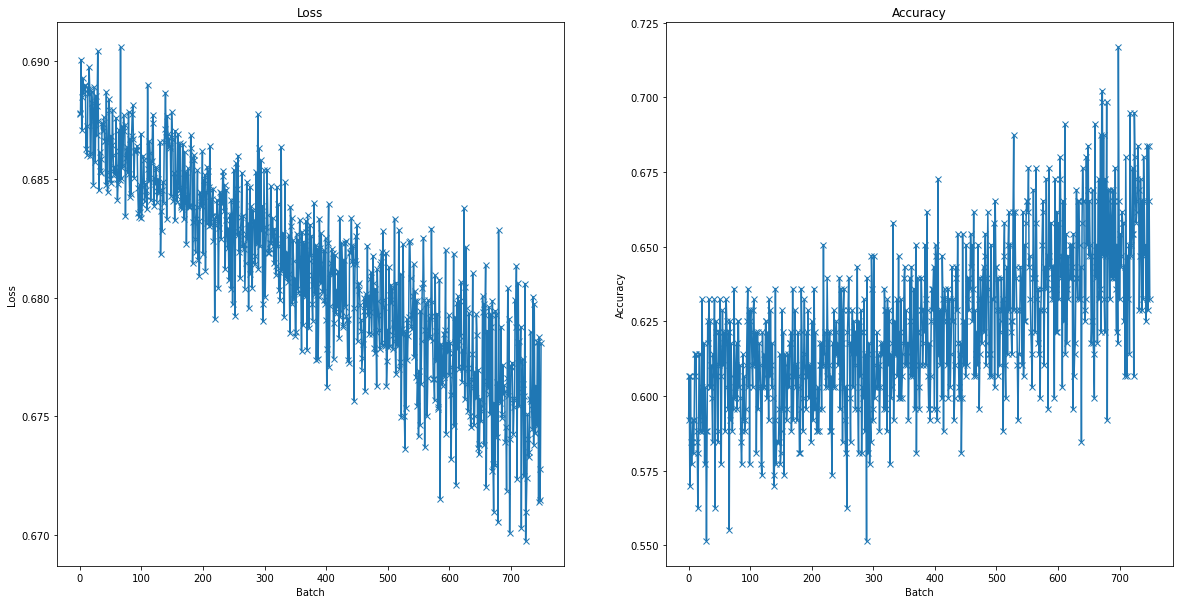

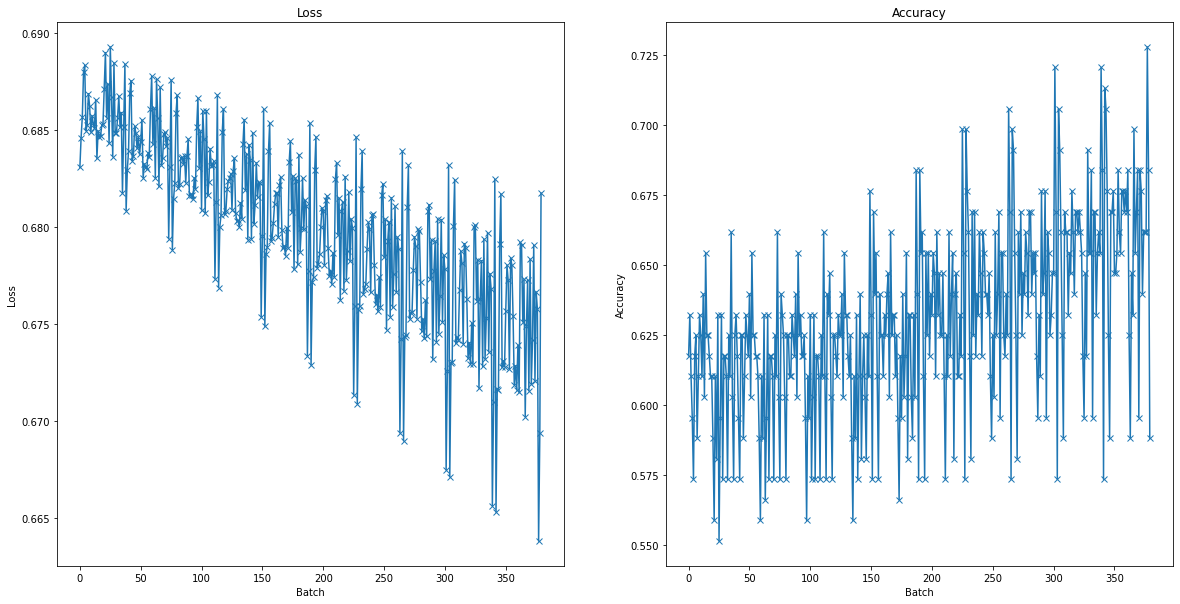

In [ ]:
plots(train_history)
plots(val_history)